Import thư viện cần thiết

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

In [79]:
# sklearn
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# A. Overview Data


Dự đoán Fraud trong promotion


# B. Let Solve Problem

## 1. Explore Data Analysis

In [80]:
df = pd.read_csv('./data/fraud_sample.csv', index_col=0)
df.head()

,customer_id,label_datetime,fraud_label,age,gender,city,occupation,education,marital_status,membership_level,...,total_tax_amount,income_source,annually_income_segment,monthly_income,total_property_value,top_property_type,in_debt,monthly_bill_amount,total_annual_bill_amount,num_bill_overdue
0,657,2021-09-24,Good,19.0,Nam,Thái Nguyên,Designer,Trung học phổ thông,Độc thân,Loyalty,...,5410000,NaN,Dưới 300 triệu,16000000.0,1500000000,Căn hộ/Chung cư,Có,NaN,135108000,8
1,9263,2021-02-22,Good,19.0,Nam,Hà Nội,Lập trình viên,Tiến sĩ,Độc thân,Loyalty,...,9656000,Kinh doanh truyền thống,Trên 1 tỷ,181000000.0,800000000,Bất động sản thương mại,Có,NaN,49524000,7
2,13576,2022-12-12,Bad,35.0,Nữ,Đắk Lắk,Lập trình viên,Đi làm,Độc thân,Loyalty,...,1467000,Làm thuê,Trên 3 tỷ,NaN,600000000,Căn hộ/Chung cư,Không,NaN,499464000,11
3,6886,2022-12-24,Bad,30.0,NaN,Bình Dương,Kỹ sư,Trung học phổ thông,Độc thân,Loyalty,...,2289000,Làm thuê,Từ 300 triệu tới 1 tỷ,9000000.0,500000000,Đất đai,Không,49200000.0,422304000,4
4,1850,2021-10-05,Good,14.0,Nam,Hà Nội,Kỹ sư,Sinh viên,Độc thân,Loyalty,...,1146000,Làm thuê,Dưới 300 triệu,NaN,1100000000,Căn hộ/Chung cư,Không,NaN,253740000,13


In [81]:
df.select_dtypes(include=[object])

,label_datetime,fraud_label,gender,city,occupation,education,marital_status,membership_level,has_used_jailbreak,is_blacklist,top_rejected_reason,top_refunded_reason,top_payment_method,top_payment_channel,income_stability,income_source,annually_income_segment,top_property_type,in_debt
0,2021-09-24,Good,Nam,Thái Nguyên,Designer,Trung học phổ thông,Độc thân,Loyalty,True,Không,Khách hàng không hài lòng với trải nghiệm mua ...,Vấn đề khác,Thanh toán bằng QR Code,Cổng thanh toán của bên thứ ba,Thất thường,NaN,Dưới 300 triệu,Căn hộ/Chung cư,Có
1,2021-02-22,Good,Nam,Hà Nội,Lập trình viên,Tiến sĩ,Độc thân,Loyalty,False,Không,Sản phẩm không hoạt động đúng cách,Sản phẩm gửi sai,Thanh toán qua cổng thanh toán trực tuyến,Điểm thanh toán tự động,Rất ổn định,Kinh doanh truyền thống,Trên 1 tỷ,Bất động sản thương mại,Có
2,2022-12-12,Bad,Nữ,Đắk Lắk,Lập trình viên,Đi làm,Độc thân,Loyalty,True,Không,Vấn đề khác,Khách hàng không nhận được hàng,Thanh toán bằng QR Code,Cổng thanh toán của bên thứ ba,Thất thường,Làm thuê,Trên 3 tỷ,Căn hộ/Chung cư,Không
3,2022-12-24,Bad,NaN,Bình Dương,Kỹ sư,Trung học phổ thông,Độc thân,Loyalty,True,Có,Vấn đề khác,Khách hàng không nhận được hàng,Thanh toán qua cổng thanh toán trực tuyến,Ứng dụng điện thoại di động,Rất ổn định,Làm thuê,Từ 300 triệu tới 1 tỷ,Đất đai,Không
4,2021-10-05,Good,Nam,Hà Nội,Kỹ sư,Sinh viên,Độc thân,Loyalty,True,Không,Sản phẩm không hoạt động đúng cách,"Khách hàng đổi ý, không muốn mua nữa",Thanh toán qua cổng thanh toán trực tuyến,Cửa hàng trực tiếp,Rất ổn định,Làm thuê,Dưới 300 triệu,Căn hộ/Chung cư,Không
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2021-07-11,Good,Nam,Bình Dương,Kiến trúc sư,Đại học,Độc thân,Standard,NaN,Không,Vấn đề khác,Sản phẩm đã hết hạn sử dụng,Thanh toán qua cổng thanh toán trực tuyến,Ứng dụng điện thoại di động,Ổn định,NaN,Dưới 300 triệu,Căn hộ/Chung cư,Không
3329,2022-08-06,Good,Nam,Hồ Chí Minh,Giám đốc,Đi làm,Đã kết hôn,Standard,False,Không,Khách hàng không hài lòng với trải nghiệm mua ...,Sản phẩm gửi sai,Tiền mặt khi nhận hàng (COD),Ứng dụng điện thoại di động,Ổn định,NaN,Trên 3 tỷ,Đất đai,Không
3330,2022-07-31,Good,Nam,Đà Nẵng,Lập trình viên,Sinh viên,Độc thân,Loyalty,True,Không,Dịch vụ không chuyên nghiệp,Sản phẩm nhận không đủ số lượng,Thanh toán qua cổng thanh toán trực tuyến,Giao diện thanh toán trực tuyến trên website,Ổn định,Làm thuê,Trên 1 tỷ,Bất động sản thương mại,Có
3331,2022-06-05,Good,Nữ,Bình Phước,Diễn viên,Trung học phổ thông,Độc thân,Loyalty,False,Không,Dịch vụ không chuyên nghiệp,Sản phẩm không đúng mô tả,Chuyển khoản ngân hàng,Cổng thanh toán của bên thứ ba,Tạm ổn,NaN,Trên 3 tỷ,Nhà ở chính,Không


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 3332
Data columns (total 62 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        3333 non-null   int64  
 1   label_datetime                     3333 non-null   object 
 2   fraud_label                        3333 non-null   object 
 3   age                                2984 non-null   float64
 4   gender                             2802 non-null   object 
 5   city                               3333 non-null   object 
 6   occupation                         3333 non-null   object 
 7   education                          3333 non-null   object 
 8   marital_status                     3333 non-null   object 
 9   membership_level                   3333 non-null   object 
 10  customer_points                    2330 non-null   float64
 11  total_redeemed_points              3333 non-null   int64  
 1

chuyển các cột date sang đúng dtype

In [83]:
# Fix datetime col
df['label_datetime'] = pd.to_datetime(df['label_datetime'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 3332
Data columns (total 62 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   customer_id                        3333 non-null   int64         
 1   label_datetime                     3333 non-null   datetime64[ns]
 2   fraud_label                        3333 non-null   object        
 3   age                                2984 non-null   float64       
 4   gender                             2802 non-null   object        
 5   city                               3333 non-null   object        
 6   occupation                         3333 non-null   object        
 7   education                          3333 non-null   object        
 8   marital_status                     3333 non-null   object        
 9   membership_level                   3333 non-null   object        
 10  customer_points                    2330 n

Một vài column bị null rất nhiều

### 1.1 Explore Target

Explore target, tỉ lệ

- Non-fraud/fraud

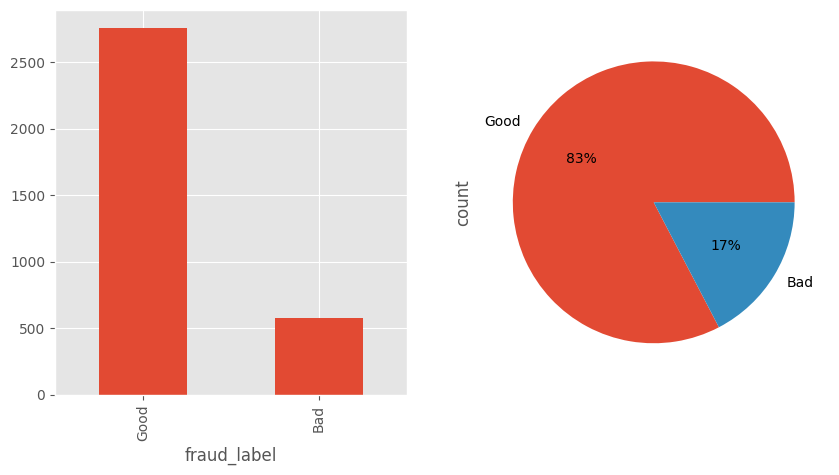

In [85]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
df['fraud_label'].value_counts().plot(kind='bar',ax=axs[0])
df['fraud_label'].value_counts().plot(kind='pie', autopct='%.0f%%', ax=axs[1])
plt.show()

### 1.2 Examine Numercial Features

Mình sẽ lấy các numerical features ra

In [86]:
df.select_dtypes(include=[int,float])

,customer_id,age,customer_points,total_redeemed_points,discount_rate,aov_last_30days,membership_lifespan,num_day_since_last_active,num_active_last_7d,num_active_last_14d,...,prob_abnormal_activity,num_select_promotion,num_interest_products,income_spending_ratio,total_tax_amount,monthly_income,total_property_value,monthly_bill_amount,total_annual_bill_amount,num_bill_overdue
0,657,19.0,461.0,94,0.03,47926.561139,576.0,262,133,441,...,0.89,NaN,14,0.957445,5410000,16000000.0,1500000000,NaN,135108000,8
1,9263,19.0,300.0,61,0.03,20896.638463,277.0,82,188,515,...,0.19,NaN,13,0.652132,9656000,181000000.0,800000000,NaN,49524000,7
2,13576,35.0,402.0,218,0.03,95831.747912,21.0,205,16,528,...,0.60,989.0,8,0.966139,1467000,NaN,600000000,NaN,499464000,11
3,6886,30.0,293.0,259,0.04,8822.900507,583.0,58,280,154,...,0.87,484.0,39,0.513682,2289000,9000000.0,500000000,49200000.0,422304000,4
4,1850,14.0,NaN,153,0.04,64454.837779,891.0,165,183,588,...,0.62,90.0,17,0.306142,1146000,NaN,1100000000,NaN,253740000,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,6462,24.0,NaN,3,0.01,57425.083187,780.0,187,178,13,...,0.65,NaN,0,0.134307,8159000,797000000.0,1800000000,2900000.0,225252000,18
3329,1229,31.0,61.0,31,0.01,94599.690247,507.0,264,57,143,...,0.76,NaN,27,0.978269,3445000,NaN,1700000000,NaN,59280000,24
3330,3543,20.0,311.0,25,0.04,19055.111934,811.0,234,114,177,...,0.95,NaN,27,0.036441,6292000,2000000.0,1800000000,15100000.0,377772000,17
3331,3862,29.0,433.0,298,0.04,51237.549425,NaN,241,169,371,...,0.73,NaN,19,0.277808,8154000,1000000.0,1300000000,3100000.0,222240000,6


In [87]:
df.select_dtypes(include=[int,float]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 3332
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   3333 non-null   int64  
 1   age                           2984 non-null   float64
 2   customer_points               2330 non-null   float64
 3   total_redeemed_points         3333 non-null   int64  
 4   discount_rate                 3333 non-null   float64
 5   aov_last_30days               3173 non-null   float64
 6   membership_lifespan           2338 non-null   float64
 7   num_day_since_last_active     3333 non-null   int64  
 8   num_active_last_7d            3333 non-null   int64  
 9   num_active_last_14d           3333 non-null   int64  
 10  num_active_last_30d           3333 non-null   int64  
 11  most_active_hour              3333 non-null   int64  
 12  num_apply_lending             2365 non-null   float64
 13  num_reje

In [88]:
num_columns = [col for col in df.columns if col.startswith('num')]
num_columns

['num_day_since_last_active',
 'num_active_last_7d',
 'num_active_last_14d',
 'num_active_last_30d',
 'num_apply_lending',
 'num_reject_lending_by_3pt',
 'num_completed_txn',
 'num_canceled_txn',
 'num_reject_txn',
 'num_refunded_txn',
 'num_used_promotion',
 'num_select_promotion',
 'num_interest_products',
 'num_bill_overdue']

In [89]:
df[num_columns].head()

,num_day_since_last_active,num_active_last_7d,num_active_last_14d,num_active_last_30d,num_apply_lending,num_reject_lending_by_3pt,num_completed_txn,num_canceled_txn,num_reject_txn,num_refunded_txn,num_used_promotion,num_select_promotion,num_interest_products,num_bill_overdue
0,262,133,441,768,5.0,17,29,26,17,10,86,NaN,14,8
1,82,188,515,221,4.0,11,6,51,53,4,62,NaN,13,7
2,205,16,528,619,15.0,17,1,1,23,12,72,989.0,8,11
3,58,280,154,494,NaN,6,36,72,65,13,94,484.0,39,4
4,165,183,588,789,10.0,16,186,39,41,2,92,90.0,17,13


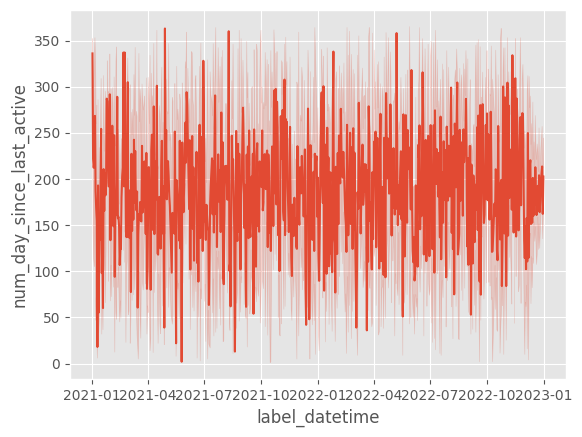

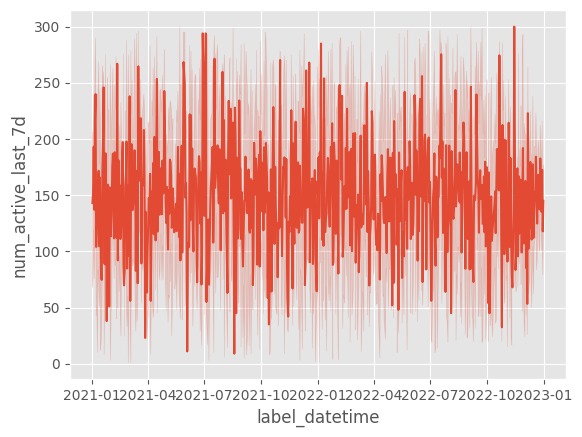

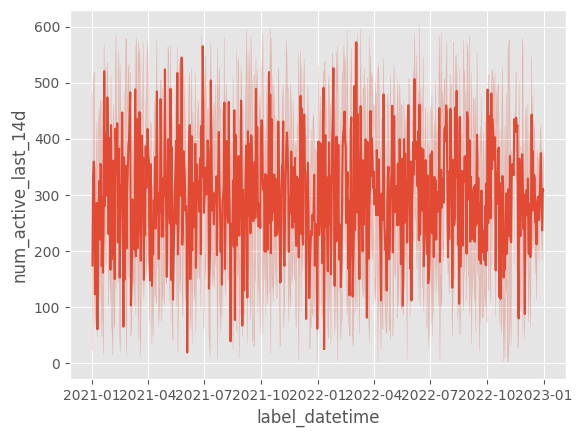

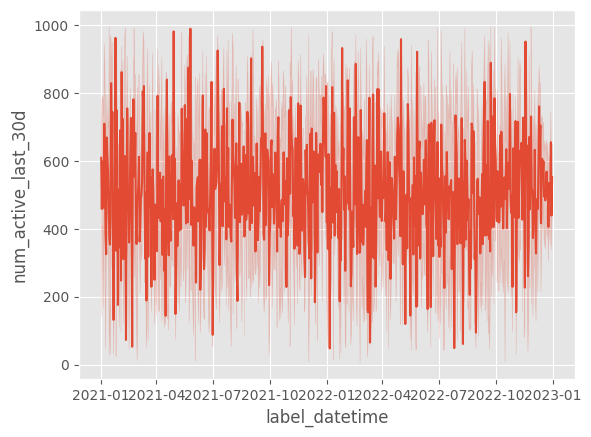

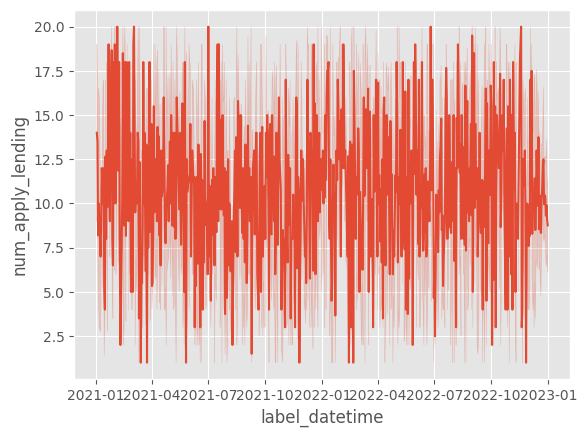

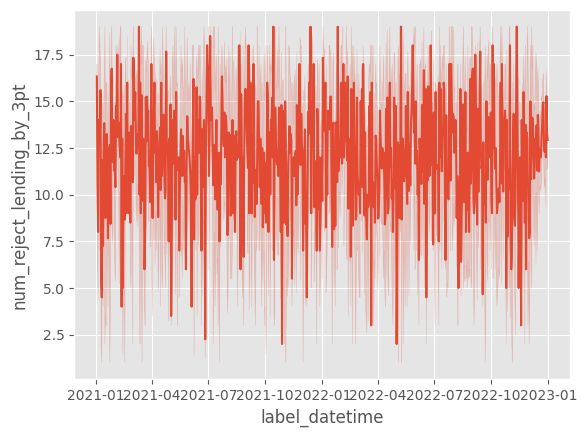

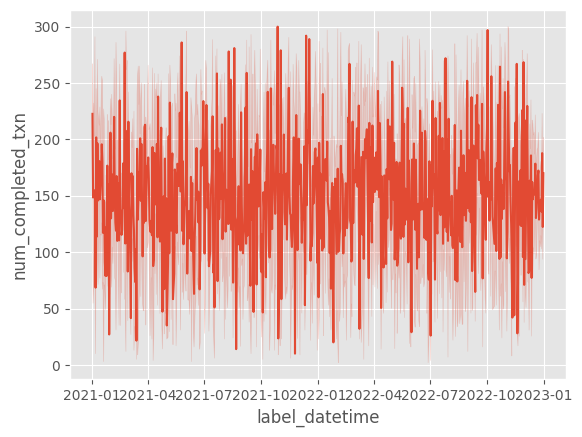

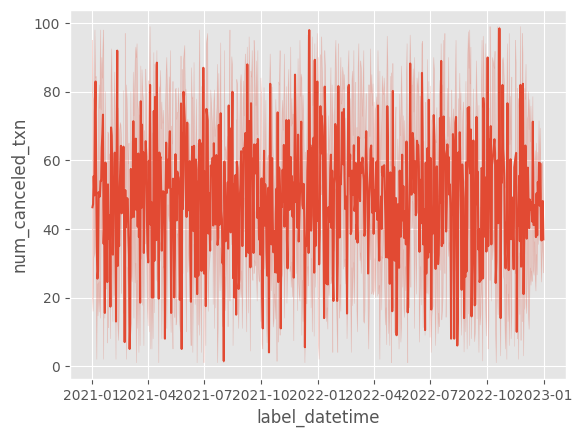

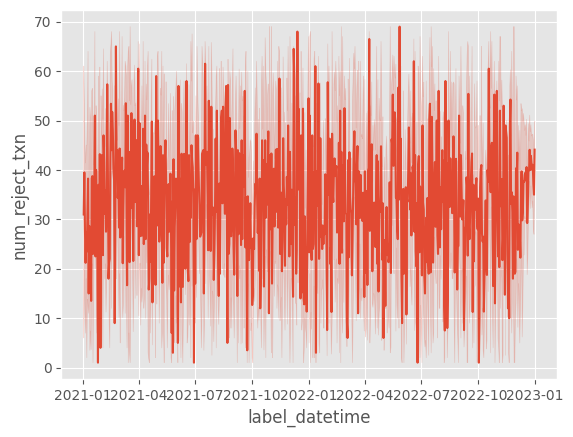

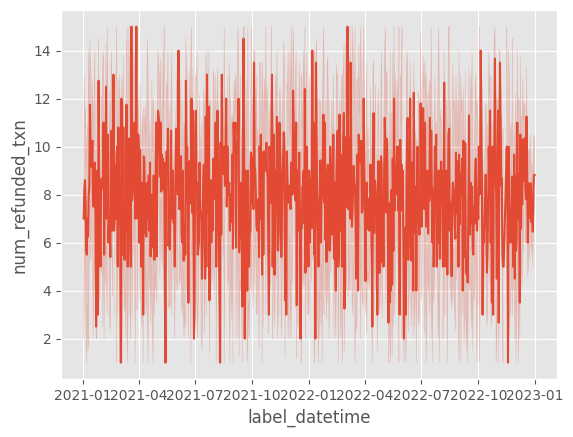

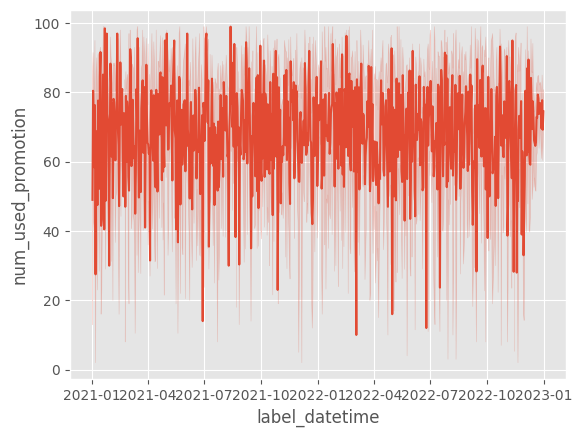

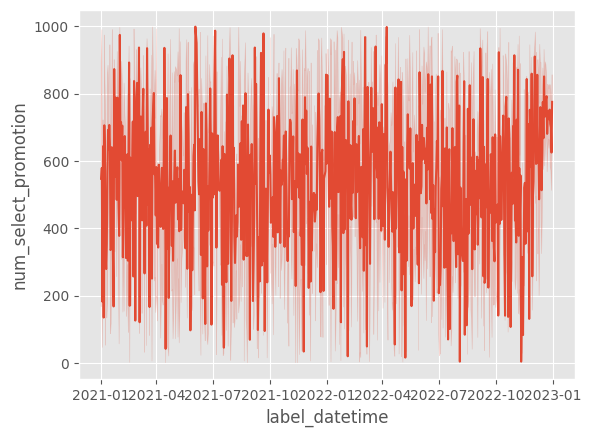

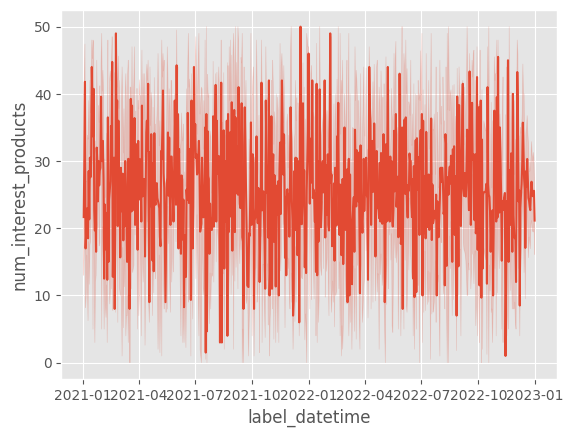

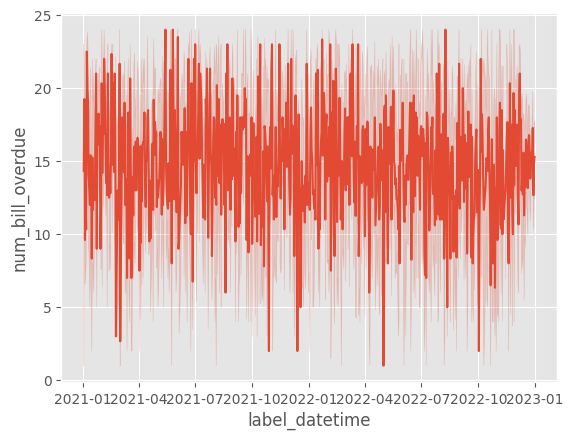

In [90]:
for i in num_columns:
    sns.lineplot(y=i,x='label_datetime',data=df)
    plt.show()

feature most_active_hour (thời gian hoạt động active nhất trong ngày), num_bill_overdue(số bill quá hạn),num_reject_lending_by_3pt, num_apply_lending những feature này là category feature chứ không phải là numerical feature

In [91]:
# Get numerical feature columns
numfeat_cols = df.select_dtypes(include=np.number).drop(columns=['customer_id','num_apply_lending','num_reject_lending_by_3pt','num_bill_overdue','most_active_hour']).columns.tolist()
if 'fraud_label' in numfeat_cols:
    numfeat_cols.remove('fraud_label')
len(numfeat_cols),numfeat_cols

(34,
 ['age',
  'customer_points',
  'total_redeemed_points',
  'discount_rate',
  'aov_last_30days',
  'membership_lifespan',
  'num_day_since_last_active',
  'num_active_last_7d',
  'num_active_last_14d',
  'num_active_last_30d',
  'total_amount_spent',
  'total_amount_spent_last_30d',
  'total_amount_spent_last_60d',
  'total_amount_spent_last_90d',
  'total_amount_spent_last_180d',
  'total_amount_spent_last_365d',
  'total_tax_amount_spent',
  'total_fee_amount_spent',
  'num_completed_txn',
  'num_canceled_txn',
  'num_reject_txn',
  'pct_reject2total_txn',
  'num_refunded_txn',
  'prob_abuse_promotion',
  'num_used_promotion',
  'prob_abnormal_activity',
  'num_select_promotion',
  'num_interest_products',
  'income_spending_ratio',
  'total_tax_amount',
  'monthly_income',
  'total_property_value',
  'monthly_bill_amount',
  'total_annual_bill_amount'])

Xem các thông tin cơ bản

In [92]:
df.describe()

,customer_id,label_datetime,age,customer_points,total_redeemed_points,discount_rate,aov_last_30days,membership_lifespan,num_day_since_last_active,num_active_last_7d,...,prob_abnormal_activity,num_select_promotion,num_interest_products,income_spending_ratio,total_tax_amount,monthly_income,total_property_value,monthly_bill_amount,total_annual_bill_amount,num_bill_overdue
count,3333.000000,3333,2984.000000,2330.000000,3333.000000,3333.000000,3173.000000,2338.000000,3333.000000,3333.000000,...,3206.000000,2333.000000,3333.000000,3333.000000,3.333000e+03,2.983000e+03,3.333000e+03,1.661000e+03,3.333000e+03,3333.000000
mean,7493.146415,2022-01-31 15:32:46.876687616,26.322051,265.128755,131.733573,0.039202,50384.975364,517.017109,185.557756,150.144914,...,0.684663,553.166738,25.586859,0.493555,4.965836e+06,4.601700e+08,1.246295e+09,2.619049e+07,2.997997e+08,14.747375
min,0.000000,2021-01-02 00:00:00,10.000000,0.000000,0.000000,0.010000,23.713233,11.000000,1.000000,1.000000,...,0.010000,1.000000,0.000000,0.000079,1.010000e+05,1.000000e+06,1.000000e+08,1.000000e+05,3.840000e+05,1.000000
25%,3810.000000,2021-07-24 00:00:00,19.000000,26.000000,10.000000,0.020000,25471.156374,324.000000,93.000000,73.000000,...,0.540000,312.000000,13.000000,0.243990,2.472000e+06,1.020000e+08,9.000000e+08,1.350000e+07,1.510800e+08,10.000000
50%,7455.000000,2022-02-06 00:00:00,25.000000,112.500000,36.000000,0.030000,50300.996269,540.000000,186.000000,148.000000,...,0.740000,589.000000,26.000000,0.488781,4.964000e+06,4.670000e+08,1.300000e+09,2.710000e+07,3.007920e+08,16.000000
75%,11214.000000,2022-08-18 00:00:00,31.000000,486.000000,197.000000,0.050000,75410.913849,727.750000,279.000000,227.000000,...,0.890000,811.000000,38.000000,0.742791,7.413000e+06,7.795000e+08,1.700000e+09,3.940000e+07,4.459560e+08,20.000000
max,14990.000000,2022-12-31 00:00:00,79.000000,1000.000000,941.000000,0.100000,99880.751805,899.000000,365.000000,300.000000,...,0.990000,999.000000,50.000000,0.999995,9.998000e+06,9.990000e+08,1.900000e+09,4.990000e+07,5.999400e+08,24.000000
std,4300.583757,NaN,10.985339,292.294041,180.794201,0.028298,28611.125173,243.334044,106.340458,87.657368,...,0.247395,293.293958,14.492165,0.287360,2.861407e+06,3.408963e+08,4.871662e+08,1.457597e+07,1.721619e+08,6.565335


Nhiều feature có range dao động rất lớn ví dụ monthly_income, total_property_value, monthly_bill_amount...

Chúng ta sẽ cần standardize chúng lại nếu ko sẽ xảy ra vấn đề một số **feature bị overweighted** trong quá trình training

Chúng ta sẽ làm kiểm tra feature correlation, đính kèm label vào để xem xu hướng các feature và mối tương quan của chúng

In [93]:
# covert label sang 0/1
df['fraud_label'] = df['fraud_label'].apply(lambda x: 1 if x == 'Bad' else 0)

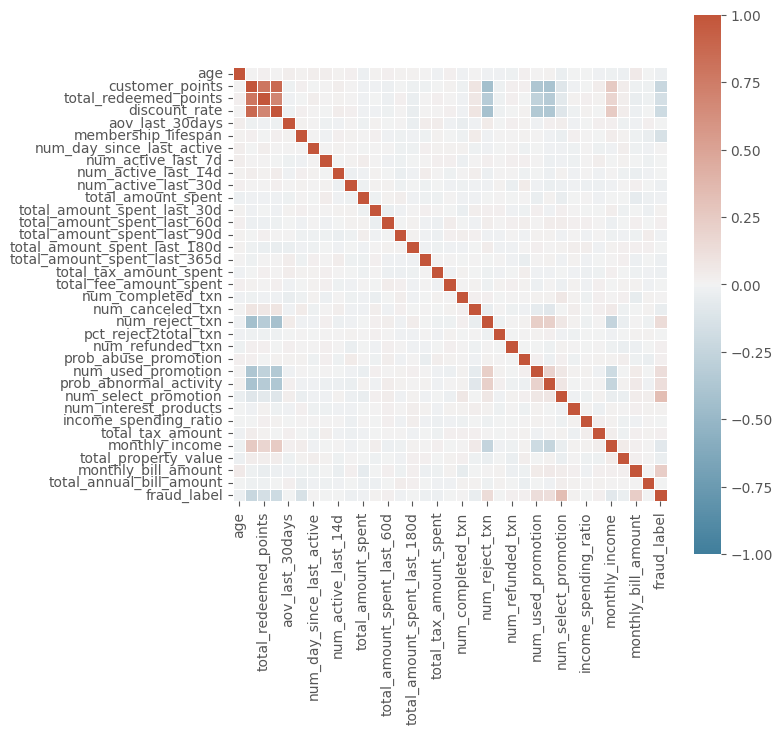

In [94]:
plt.figure(figsize=(7,7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr_maxtrix = df[numfeat_cols + ['fraud_label']].corr()
sns.heatmap(corr_maxtrix, cmap=cmap, center=0, square=True, linewidths=.5, vmin=-1, vmax=1, fmt=".2f")
plt.show()

### 1.3 Examine Category Features

Chúng ta sẽ kiểm tra category feature

In [95]:
# Get category feature columns
catfeat_cols = df.select_dtypes(include=['object', bool]).columns.tolist() + ['num_apply_lending','num_reject_lending_by_3pt','num_bill_overdue','most_active_hour']
if 'fraud_label' in numfeat_cols:
    catfeat_cols.remove('fraud_label')
len(catfeat_cols), catfeat_cols

(25,
 ['gender',
  'city',
  'occupation',
  'education',
  'marital_status',
  'membership_level',
  'has_fraud_txn',
  'has_used_jailbreak',
  'is_emulator',
  'is_blacklist',
  'signup_in_latenight',
  'top_rejected_reason',
  'top_refunded_reason',
  'top_payment_method',
  'top_payment_channel',
  'is_ordering_shipping_address_same',
  'income_stability',
  'income_source',
  'annually_income_segment',
  'top_property_type',
  'in_debt',
  'num_apply_lending',
  'num_reject_lending_by_3pt',
  'num_bill_overdue',
  'most_active_hour'])

Check unique values of each category features

In [96]:
df[catfeat_cols].nunique()

gender                                3
city                                 62
occupation                           22
education                             7
marital_status                        7
membership_level                      3
has_fraud_txn                         2
has_used_jailbreak                    2
is_emulator                           2
is_blacklist                          2
signup_in_latenight                   2
top_rejected_reason                   7
top_refunded_reason                   8
top_payment_method                    5
top_payment_channel                   5
is_ordering_shipping_address_same     2
income_stability                      4
income_source                         6
annually_income_segment               4
top_property_type                     4
in_debt                               2
num_apply_lending                    20
num_reject_lending_by_3pt            19
num_bill_overdue                     24
most_active_hour                     24


## 2. Data Pipeline

### 2.1 Train/Test selection

- Đa phần label ở các tháng đều tương đồng, duy nhất có rất nhiều label ở tháng 2022-12 (đây có thể là tháng diễn ra event của công ty)

<Axes: xlabel='label_datetime'>

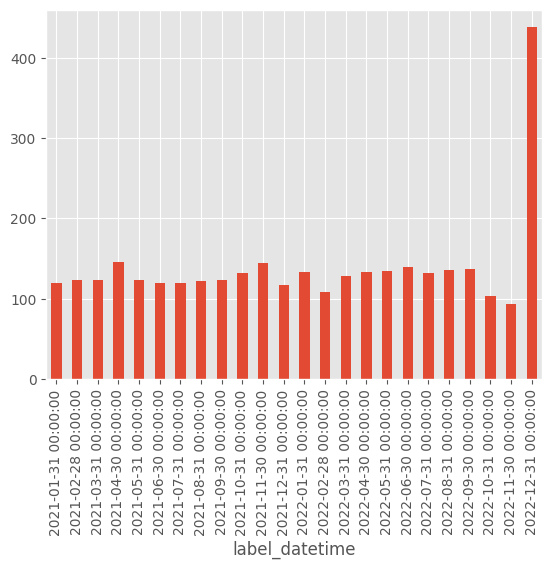

In [97]:
df.set_index('label_datetime')['customer_id'].resample('1M').nunique().plot(kind='bar')

In [98]:
# ta sẽ lấy dữ liệu quá khứ để dự đoán tương lai
selected_date = '2022-10-01'
train_data = df[df['label_datetime'] < selected_date]
test_data = df[df['label_datetime'] >= selected_date]

# No sample is ignored
train_data.shape, test_data.shape

((2698, 62), (635, 62))

Train and test dataset size is 81:19

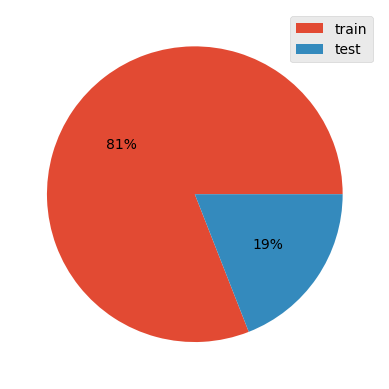

In [99]:
plt.figure()
plt.pie(x=[train_data.shape[0], test_data.shape[0]], autopct='%.0f%%')
plt.legend(['train','test'])
plt.show()

### 2.2 Feature Transformation

Chúng ta sẽ đi qua phần feature transformation

#### 2.2.1 Feature Pipeline

In [100]:
# all feat cols
feat_cols = numfeat_cols + catfeat_cols
len(feat_cols), feat_cols

(59,
 ['age',
  'customer_points',
  'total_redeemed_points',
  'discount_rate',
  'aov_last_30days',
  'membership_lifespan',
  'num_day_since_last_active',
  'num_active_last_7d',
  'num_active_last_14d',
  'num_active_last_30d',
  'total_amount_spent',
  'total_amount_spent_last_30d',
  'total_amount_spent_last_60d',
  'total_amount_spent_last_90d',
  'total_amount_spent_last_180d',
  'total_amount_spent_last_365d',
  'total_tax_amount_spent',
  'total_fee_amount_spent',
  'num_completed_txn',
  'num_canceled_txn',
  'num_reject_txn',
  'pct_reject2total_txn',
  'num_refunded_txn',
  'prob_abuse_promotion',
  'num_used_promotion',
  'prob_abnormal_activity',
  'num_select_promotion',
  'num_interest_products',
  'income_spending_ratio',
  'total_tax_amount',
  'monthly_income',
  'total_property_value',
  'monthly_bill_amount',
  'total_annual_bill_amount',
  'gender',
  'city',
  'occupation',
  'education',
  'marital_status',
  'membership_level',
  'has_fraud_txn',
  'has_used_j

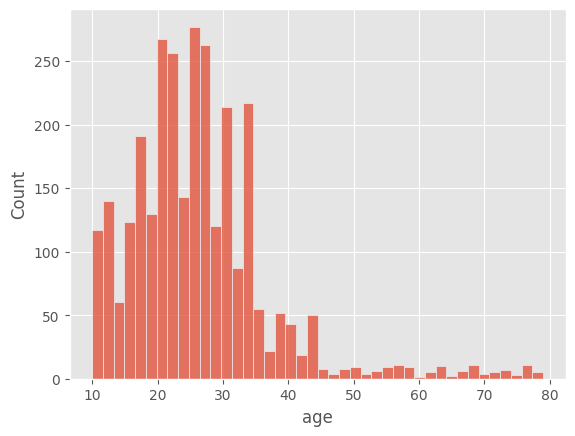

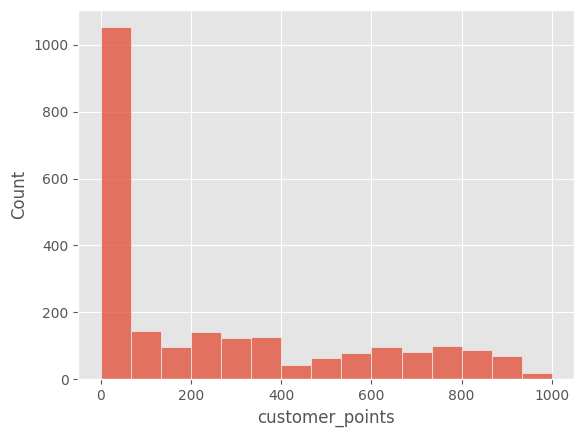

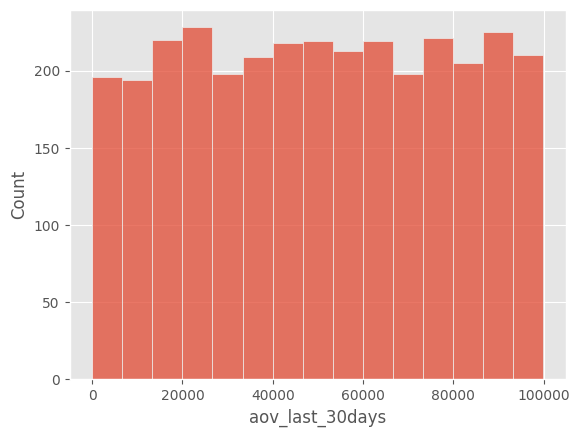

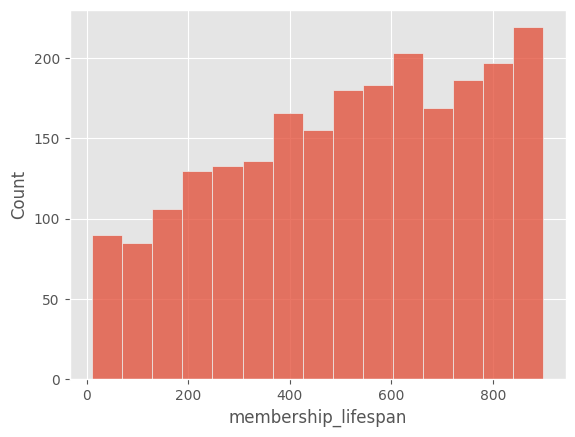

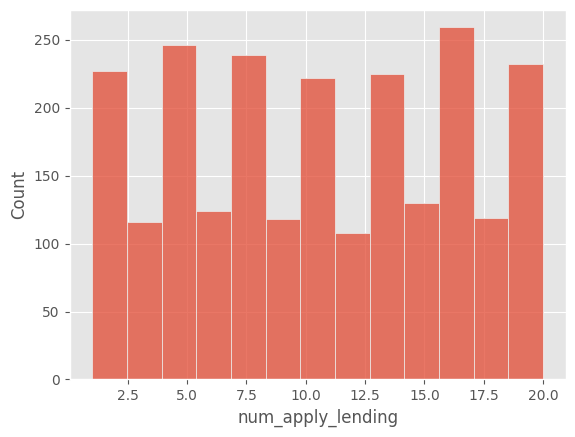

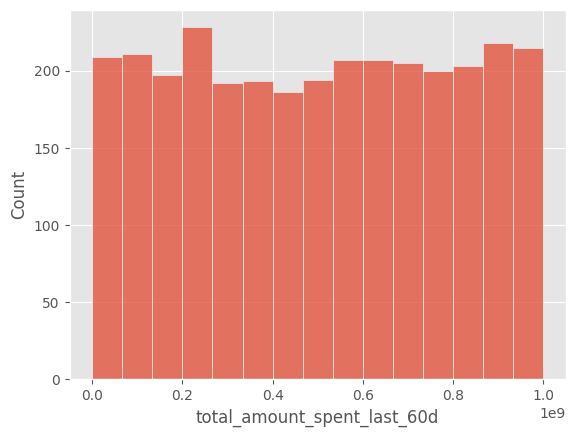

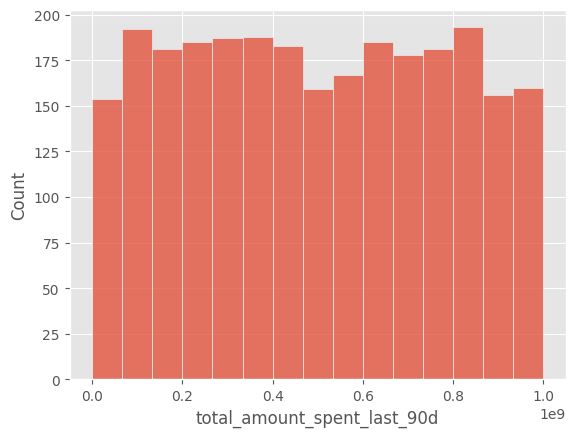

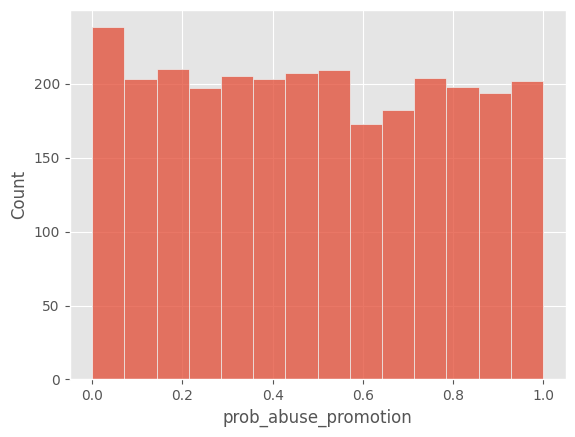

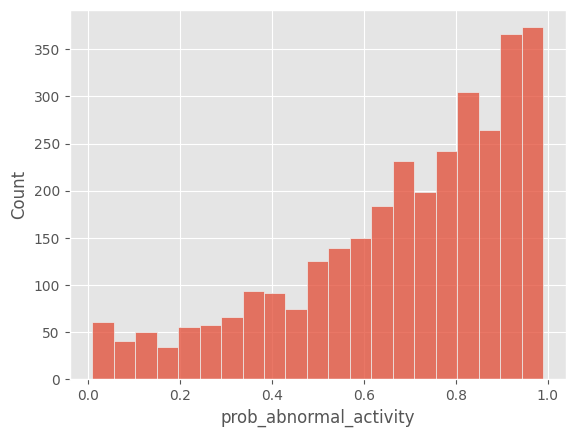

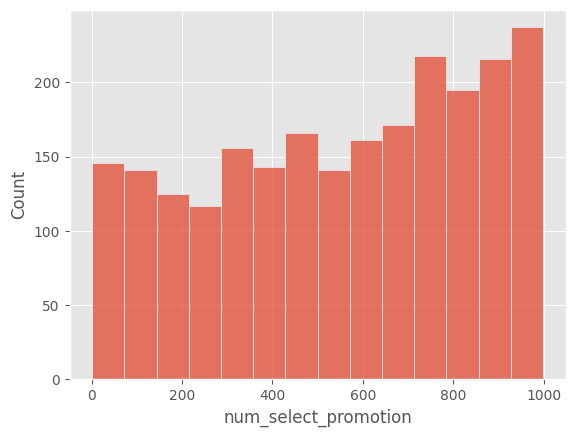

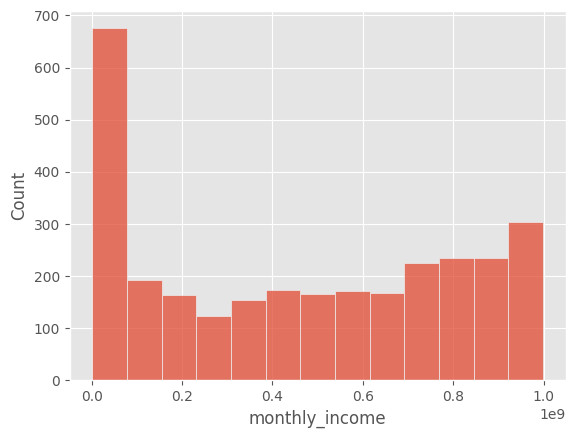

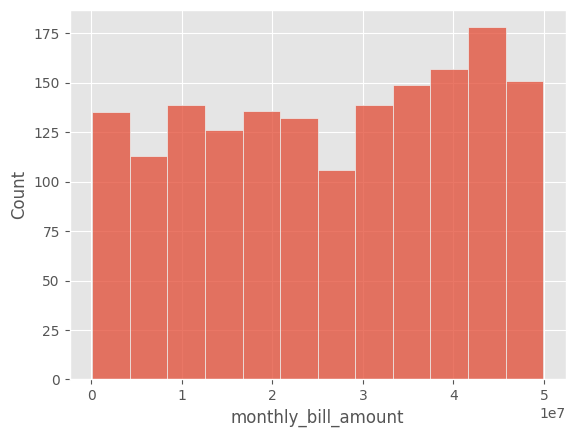

In [128]:
missing_columns = df.columns[df.isnull().any()].to_list()
missing_data_numeric = df[missing_columns].select_dtypes(exclude=[object,bool])
for i in missing_data_numeric.columns:
    sns.histplot(missing_data_numeric[i])
    plt.show()

- SimpleImputer: để fill các giá trị null bằng giá trị median/mean/min/max/q25...

- StandardScaler: để standardize các numerical feature mà range nó quá rộng


Sử dụng Pipeline của sklearn để thiết kế cái khung trước

Ta chọn median thay vì mean vì dữ liệu ở trên thiên hướng skew

In [129]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

Sử dụng OneHotEncoder và handle những giá trị chưa từng biết bằng cách treat những giá trị đó là vector zeros


In [130]:
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

Tạo feature pipeline với num và cat, hình vẽ minh họa ở dưới

In [131]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numfeat_cols),
        ("cat", categorical_transformer, catfeat_cols),
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'customer_points',
                                  'total_redeemed_points', 'discount_rate',
                                  'aov_last_30days', 'membership_lifespan',
                                  'num_day_since_last_active',
                                  'num_active_last_7d', 'num_active_last_14d',
                                  'num_active_last_30d', 'total_amount_spent',
                                  '...
                                  'is_emulator', 'is_blacklist',
                                  'signup_in_latenight', 'top_rejected_reason',
                                  'top_refunded_reason', 'top_payment_method',
                                  'top_payment_channel',
                                  'is_ordering_shipping_address_same',
                                  'income_stability', 'income_source',
                                  'annually_income_segment',
                                  'top_property_type', 'in_debt',
                                  'num_apply_lending',
                                  'num_reject_lending_by_3pt',
                                  'num_bill_overdue', 'most_active_hour'])])

#### 2.2.2 X,y of train & test

In [132]:
X_train, y_train = train_data[feat_cols], train_data['fraud_label']
X_train.shape, y_train.shape

((2698, 59), (2698,))

In [133]:
X_test, y_test = test_data[feat_cols], test_data['fraud_label']
X_test.shape, y_test.shape

((635, 59), (635,))

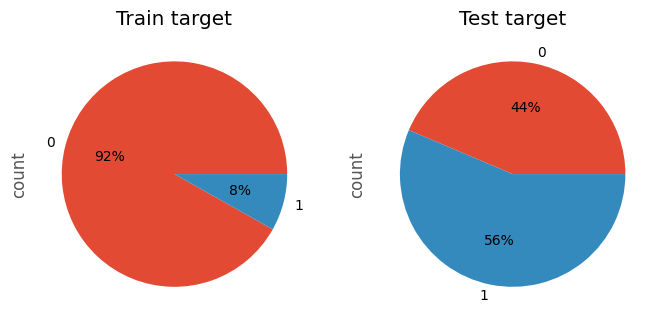

In [134]:
# Check label distribution of each dataset
fig, axs = plt.subplots(1,2, figsize=(8,5))
y_train.value_counts().sort_index().plot(kind='pie', autopct='%.0f%%',ax=axs[0], title='Train target',)
y_test.value_counts().sort_index().plot(kind='pie', autopct='%.0f%%',ax=axs[1], title='Test target')
plt.show()

Ở đây test set rất khác biệt khi lượng lớn fraud tập trung ở test, trong khi ở train, thì chỉ có 8% là fraud

Trường hợp này có thể xảy ra khi có một event diễn ra

#### 2.2.2 Feature Transform

In [135]:
# fit columns-transformer với feature 
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'customer_points',
                                  'total_redeemed_points', 'discount_rate',
                                  'aov_last_30days', 'membership_lifespan',
                                  'num_day_since_last_active',
                                  'num_active_last_7d', 'num_active_last_14d',
                                  'num_active_last_30d', 'total_amount_spent',
                                  '...
                                  'is_emulator', 'is_blacklist',
                                  'signup_in_latenight', 'top_rejected_reason',
                                  'top_refunded_reason', 'top_payment_method',
                                  'top_payment_channel',
                                  'is_ordering_shipping_address_same',
                                  'income_stability', 'income_source',
                                  'annually_income_segment',
                                  'top_property_type', 'in_debt',
                                  'num_apply_lending',
                                  'num_reject_lending_by_3pt',
                                  'num_bill_overdue', 'most_active_hour'])])

Chuyển đổi data ban đầu sang thành transformed data

In [136]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

Get new transformed feature names

In [143]:
transfeat_cols = preprocessor.get_feature_names_out()
transfeat_cols.shape, transfeat_cols

((288,),
 array(['num__age', 'num__customer_points', 'num__total_redeemed_points',
        'num__discount_rate', 'num__aov_last_30days',
        'num__membership_lifespan', 'num__num_day_since_last_active',
        'num__num_active_last_7d', 'num__num_active_last_14d',
        'num__num_active_last_30d', 'num__total_amount_spent',
        'num__total_amount_spent_last_30d',
        'num__total_amount_spent_last_60d',
        'num__total_amount_spent_last_90d',
        'num__total_amount_spent_last_180d',
        'num__total_amount_spent_last_365d', 'num__total_tax_amount_spent',
        'num__total_fee_amount_spent', 'num__num_completed_txn',
        'num__num_canceled_txn', 'num__num_reject_txn',
        'num__pct_reject2total_txn', 'num__num_refunded_txn',
        'num__prob_abuse_promotion', 'num__num_used_promotion',
        'num__prob_abnormal_activity', 'num__num_select_promotion',
        'num__num_interest_products', 'num__income_spending_ratio',
        'num__total_tax_amount'

In [138]:
np.where(transfeat_cols=='num__monthly_income')

(array([30], dtype=int64),)

In [139]:
X_train['monthly_income'].isna().sum() / len(X_train['monthly_income'])

0.09970348406226835

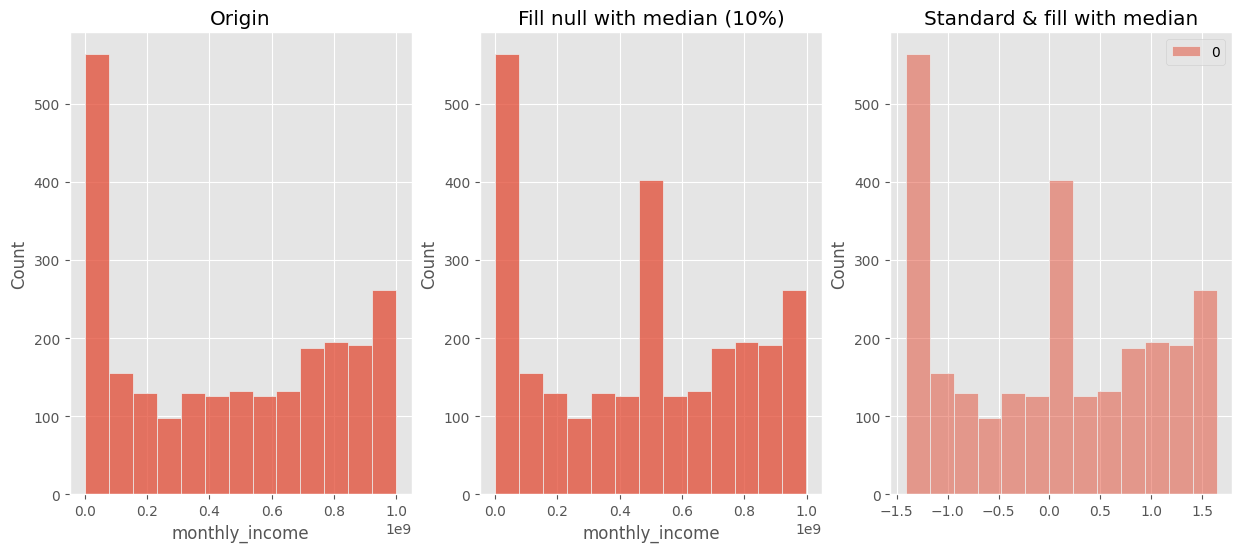

In [146]:
fig, axs = plt.subplots(1,3,figsize=(15,6))
sns.histplot(X_train['monthly_income'],ax=axs[0])
axs[0].set_title('Origin')
median_monthly_income = X_train['monthly_income'].median()
sns.histplot(X_train['monthly_income'].fillna(median_monthly_income),ax=axs[1])
axs[1].set_title('Fill null with median (10%)')
sns.histplot(X_train_transformed[:, 30].toarray(),ax=axs[2])
axs[2].set_title('Standard & fill with median')
plt.show()

In [145]:
X_train_transformed.shape, X_test_transformed.shape

((2698, 288), (635, 288))

The number of origin features is 59 and now transformed features is 288

### 2.2 Train Pipeline

#### 2.2.1 Model selection

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

In [149]:
models = [
    ('KNeighbors', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Xgboost', XGBClassifier()),
]

In [150]:
# Dict to store result of each model
results = {i[0]:{} for i in models}
results

{'KNeighbors': {},
 'Logistic Regression': {},
 'Decision Tree': {},
 'Random Forest': {},
 'Xgboost': {}}

#### 2.2.2 Model training

In [151]:
from datetime import datetime

In [170]:
for name, model in models:
    start = datetime.now()
    model.fit(X_train_transformed, y_train)
    print(name, datetime.now() - start)
    results[name]['y_train_pred'] = model.predict(X_train_transformed)
    results[name]['y_train_prob'] = model.predict_proba(X_train_transformed)
    results[name]['y_test_pred'] = model.predict(X_test_transformed)
    results[name]['y_test_prob'] = model.predict_proba(X_test_transformed)

KNeighbors 0:00:00


c:\Users\ADMIN\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 0:00:00.039502
Decision Tree 0:00:00.263252
Random Forest 0:00:01.530643
Xgboost 0:00:00.224062


## 3. Evaluation

In [153]:
from sklearn import metrics

In [171]:
metric_records = {i[0]:{} for i in models}
metric_records

{'KNeighbors': {},
 'Logistic Regression': {},
 'Decision Tree': {},
 'Random Forest': {},
 'Xgboost': {}}

In [172]:
def evalute_performance(name,model):
    def evaluate_dataset(dataset):
        print(f'Evaluate {dataset} set')
        
        y_pred = results[name][f'y_{dataset}_pred']
        y_prob = results[name][f'y_{dataset}_prob']
        y_score = y_prob[:,1] # prob of positive label
        
        if dataset == 'train':
            y_true = y_train
        else:
            y_true = y_test
        
        # AUC
        fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score, pos_label=1)
        auc_score = metrics.auc(fpr, tpr)
        print('\tAUC', auc_score)

        # ROC
        fig,axs=plt.subplots(1,3,figsize=(15,5))
        metrics.RocCurveDisplay.from_predictions(y_true, y_score, name=name, plot_chance_level=True,ax=axs[0],)
        axs[0].title.set_text('ROC binary classifibcation')

        # PRC
        metrics.PrecisionRecallDisplay.from_predictions(y_true, y_score, name=name, plot_chance_level=True, ax=axs[1],)
        axs[1].set_title("Precision-Recall curve")
        axs[1].legend(loc='best')

        # PDF
        sns.histplot(y_score,ax=axs[2])
        axs[2].set_title("Probility Distribution of Positive Label")
        plt.show()

        # classification matrix
        print('Classification Report with default threshold=0.5')
        print(metrics.classification_report(y_true, y_pred))
        p,r,f, _ = metrics.precision_recall_fscore_support(y_true, y_pred, average='binary', )
        
        metric_records[name][f'{dataset}_auc'] = auc_score
        metric_records[name][f'{dataset}_precision'] = p
        metric_records[name][f'{dataset}_recall'] = r
        metric_records[name][f'{dataset}_f1'] = f
        
    print('======================')
    print(f'Performance of {name}\n')
    evaluate_dataset('train')
    evaluate_dataset('test')
    print('\n\n')

### 3.1 KNeighbors evaluation

Performance of KNeighbors

Evaluate train set
	AUC 0.912491745542593


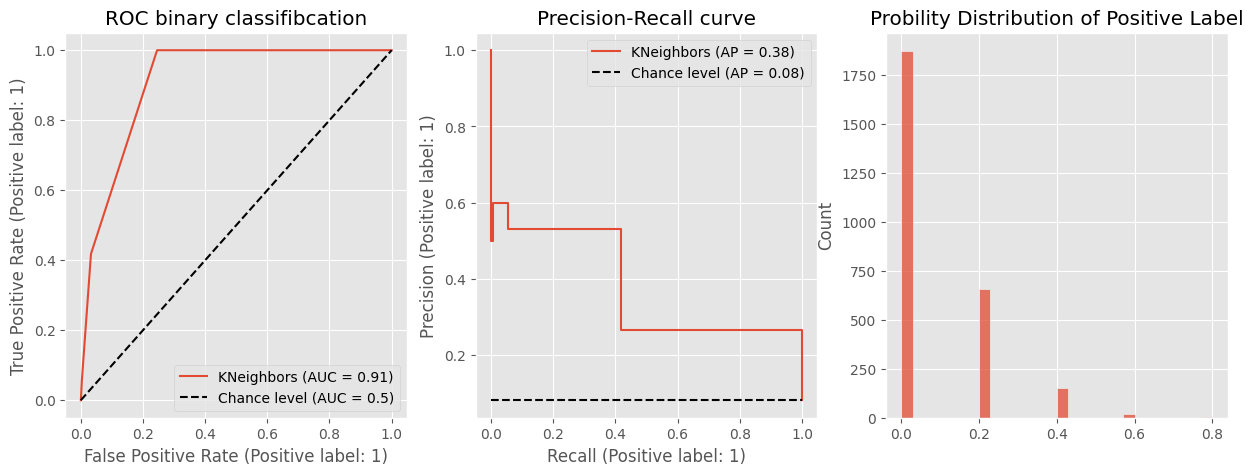

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2478
           1       0.60      0.05      0.10       220

    accuracy                           0.92      2698
   macro avg       0.76      0.53      0.53      2698
weighted avg       0.90      0.92      0.89      2698

Evaluate test set
	AUC 0.6078595486356211


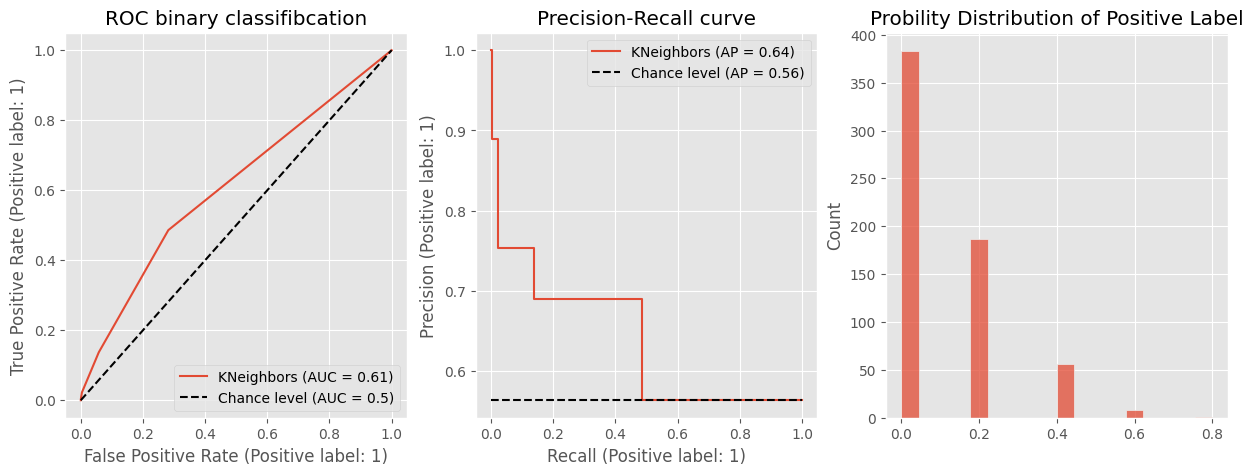

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.44      1.00      0.61       277
           1       0.89      0.02      0.04       358

    accuracy                           0.45       635
   macro avg       0.66      0.51      0.33       635
weighted avg       0.69      0.45      0.29       635






In [173]:
name, model = models[0]
evalute_performance(name, model)

### 3.2 Logistic Regression evaluation

Performance of Logistic Regression

Evaluate train set
	AUC 0.926634382566586


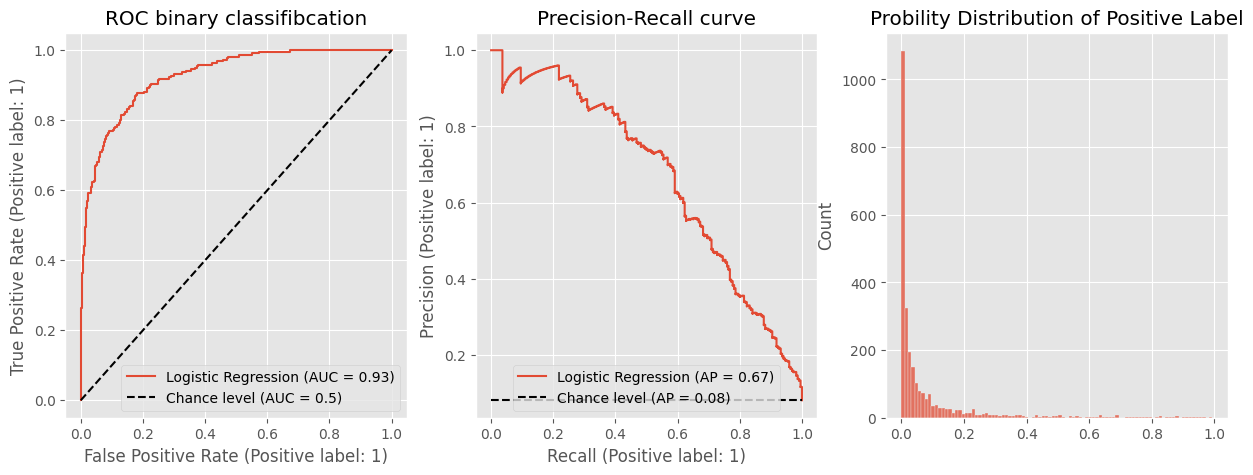

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2478
           1       0.83      0.40      0.54       220

    accuracy                           0.94      2698
   macro avg       0.89      0.70      0.76      2698
weighted avg       0.94      0.94      0.94      2698

Evaluate test set
	AUC 0.8277736320916443


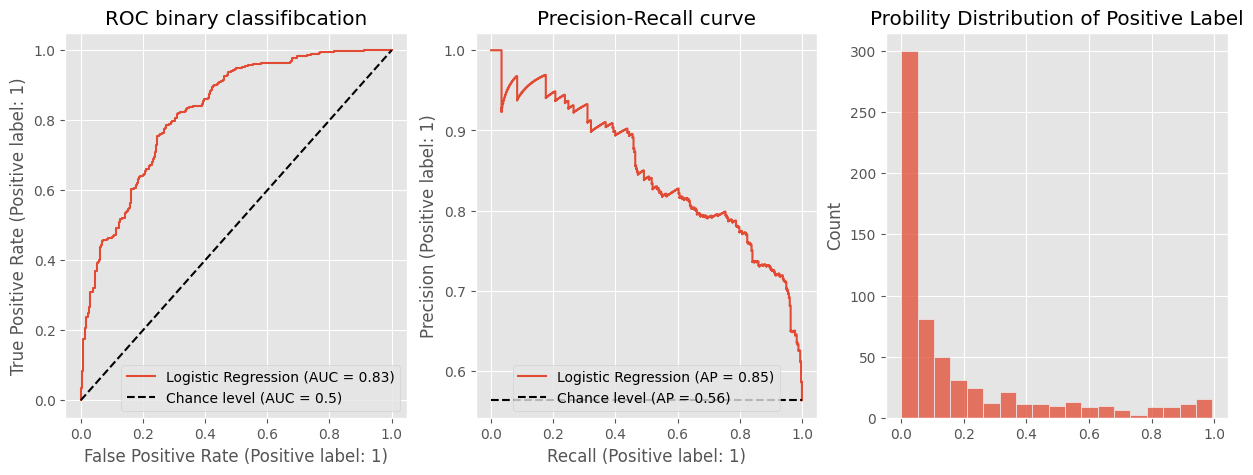

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.50      0.98      0.66       277
           1       0.94      0.23      0.37       358

    accuracy                           0.56       635
   macro avg       0.72      0.61      0.52       635
weighted avg       0.75      0.56      0.50       635






In [174]:
name, model = models[1]
evalute_performance(name, model)

### 3.3 Decision Tree evaluation

Performance of Decision Tree

Evaluate train set
	AUC 1.0


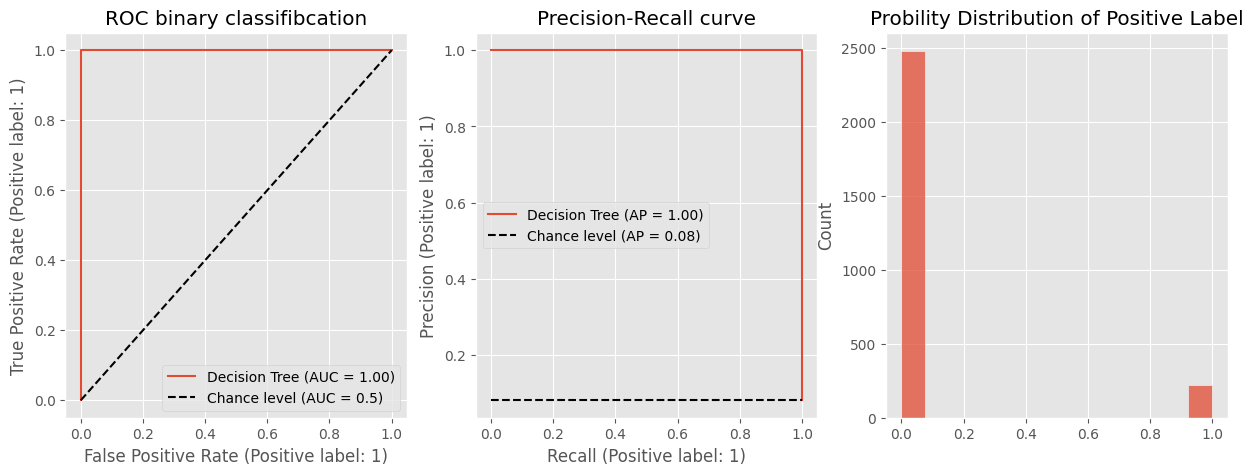

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2478
           1       1.00      1.00      1.00       220

    accuracy                           1.00      2698
   macro avg       1.00      1.00      1.00      2698
weighted avg       1.00      1.00      1.00      2698

Evaluate test set
	AUC 0.6198092088014037


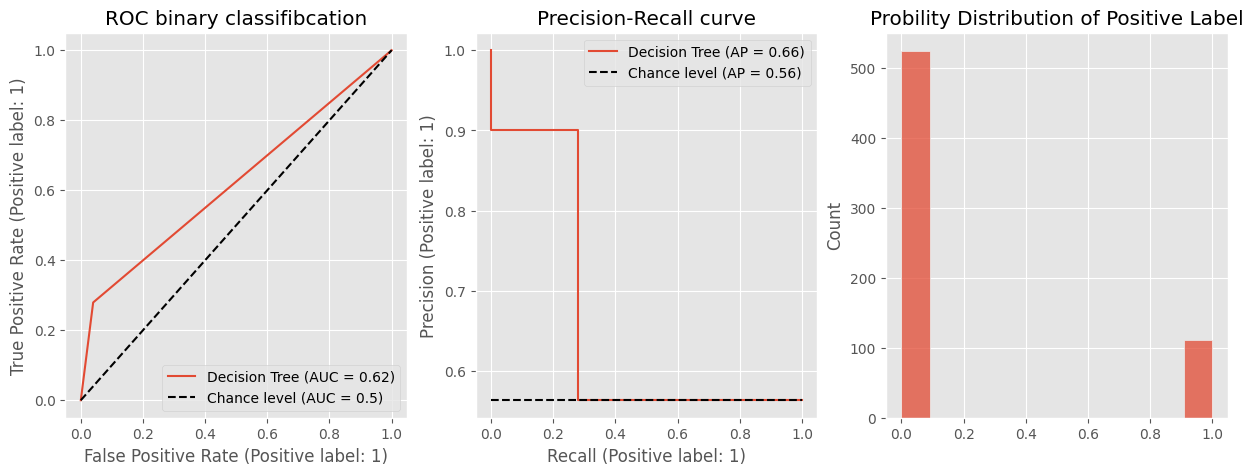

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.51      0.96      0.66       277
           1       0.90      0.28      0.43       358

    accuracy                           0.58       635
   macro avg       0.70      0.62      0.55       635
weighted avg       0.73      0.58      0.53       635






In [175]:
name, model = models[2]
evalute_performance(name, model)

### 3.4 Random Forest evaluation

Performance of Random Forest

Evaluate train set
	AUC 1.0


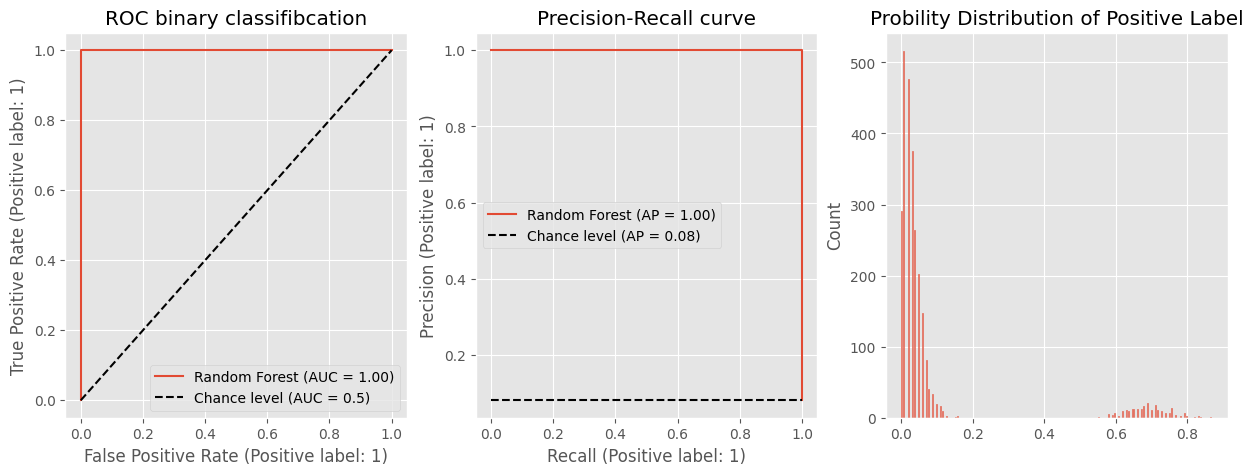

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2478
           1       1.00      1.00      1.00       220

    accuracy                           1.00      2698
   macro avg       1.00      1.00      1.00      2698
weighted avg       1.00      1.00      1.00      2698

Evaluate test set
	AUC 0.8216525825383699


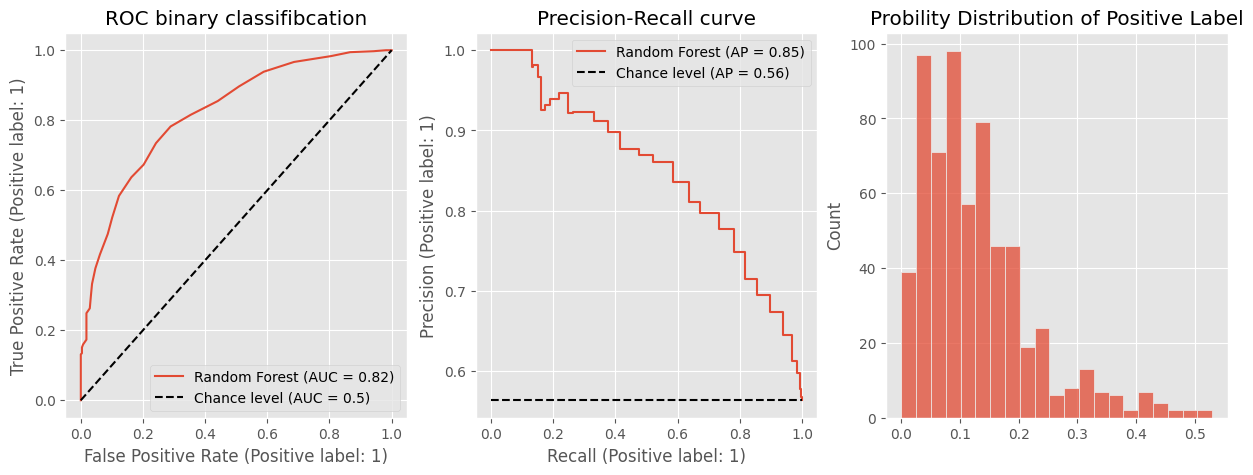

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.44      1.00      0.61       277
           1       1.00      0.01      0.01       358

    accuracy                           0.44       635
   macro avg       0.72      0.50      0.31       635
weighted avg       0.75      0.44      0.27       635






In [176]:
name, model = models[3]
evalute_performance(name, model)

### 3.5 XGboost evaluation

Performance of Xgboost

Evaluate train set
	AUC 1.0


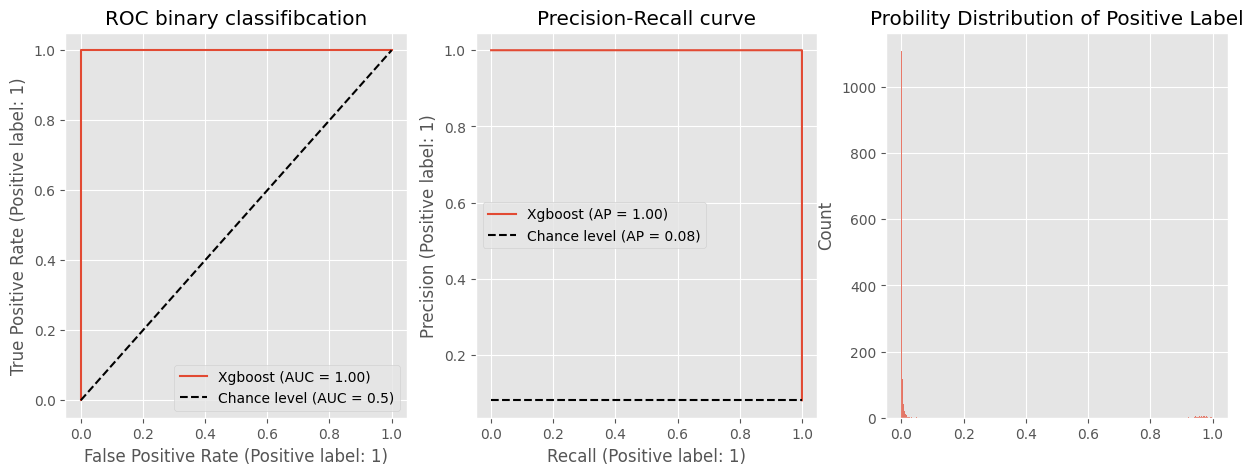

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2478
           1       1.00      1.00      1.00       220

    accuracy                           1.00      2698
   macro avg       1.00      1.00      1.00      2698
weighted avg       1.00      1.00      1.00      2698

Evaluate test set
	AUC 0.833118205836678


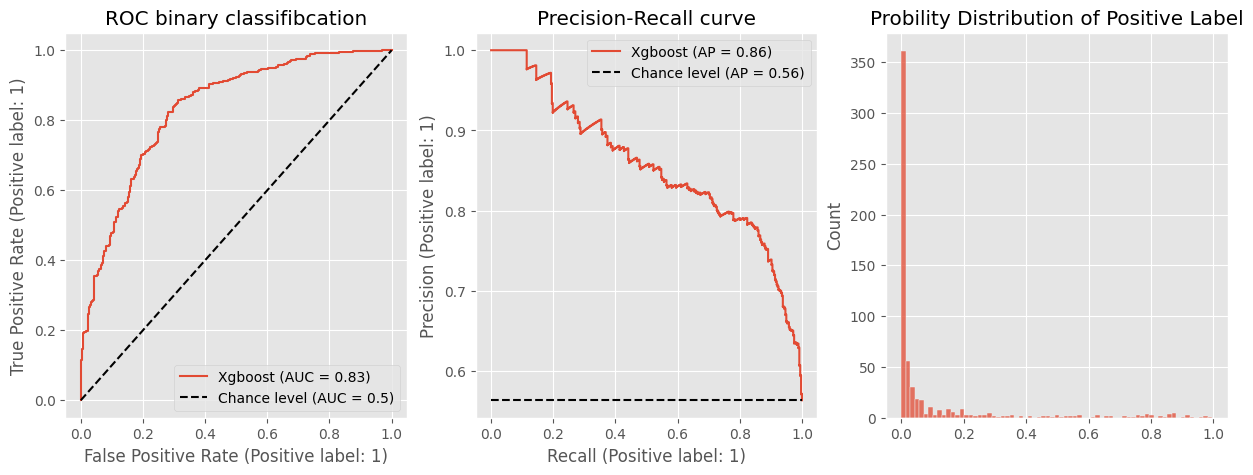

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.48      0.99      0.64       277
           1       0.97      0.16      0.27       358

    accuracy                           0.52       635
   macro avg       0.72      0.57      0.46       635
weighted avg       0.75      0.52      0.43       635






In [177]:
name, model = models[4]
evalute_performance(name, model)

### 3.6 Compare Model Performances

In [178]:
# Metric records
record_df = pd.DataFrame(metric_records)
record_df['dataset'] = record_df.index.to_series().apply(lambda x:x.split('_')[0])
record_df['metric'] = record_df.index.to_series().apply(lambda x:x.split('_')[1])
record_df.set_index(['dataset', 'metric'])

KNeighbors  Logistic Regression  Decision Tree  \
dataset metric                                                      
train   auc          0.912492             0.926634       1.000000   
        precision    0.600000             0.831776       1.000000   
        recall       0.054545             0.404545       1.000000   
        f1           0.100000             0.544343       1.000000   
test    auc          0.607860             0.827774       0.619809   
        precision    0.888889             0.943182       0.900901   
        recall       0.022346             0.231844       0.279330   
        f1           0.043597             0.372197       0.426439   

                   Random Forest   Xgboost  
dataset metric                              
train   auc             1.000000  1.000000  
        precision       1.000000  1.000000  
        recall          1.000000  1.000000  
        f1              1.000000  1.000000  
test    auc             0.821653  0.833118  
        precision       1.000000  0.965517  
        recall          0.005587  0.156425  
        f1              0.011111  0.269231

Đối với các bài toán về Fraud Detection thì chúng ta ưu tiên chọn precision ở tập test cao. Trong trường hợp này thì Random Forest đạt được 1 kết quả rất tốt. Thông thường sau khi so sánh xong, chúng ta sẽ xác định 1 metrics và chọn model tối ưu trên metric đó. (trong trường hợp này là Random Forest)

***Nhưng để học thêm những trường hợp khác nhau, chúng ta sẽ giả sử chọn Logistic Regression là model mà chúng ta thấy tối ưu***

In [180]:
name, model = models[3]
name, model

('Random Forest', RandomForestClassifier())

## 4. Thresholding

Thresholding là kỹ thuật để chọn threshold tốt nhất, với bài toán này, chúng ta sẽ trade-off 1 trong 2 lựa chọn sau:

### Higher Precision and Lower Recall

- Khi threshold đặt mức ngưỡng cao để đánh dấu gian lận, nó sẽ đánh dấu các giao dịch là gian lận chỉ khi nó rất chắc chắn về tính gian lận của chúng. Điều này dẫn đến một tỷ lệ cao các giao dịch được đánh dấu là gian lận đúng (true positives) trong số tất cả các giao dịch được đánh dấu là gian lận (bao gồm cả true positives và false positives), nghĩa là chính xác cao. Tuy nhiên, hệ thống có thể bỏ sót một số giao dịch gian lận (false negatives). **An toàn là trên hết**

### Higher Recall and Lower Precision

- Khi threshold đặt mức ngưỡng thấp, nó có khả năng phát hiện nhiều giao dịch gian lận, bao gồm cả những giao dịch có khả năng là gian lận nhỏ. Model có khả năng phát hiện được nhiều giao dịch gian lận, giảm nguy cơ bỏ sót giao dịch gian lận (false negatives). Tuy nhiên, do hệ thống đánh dấu các giao dịch có khả năng là gian lận nhỏ, có thể dẫn đến một số lượng giao dịch không gian lận bị đánh dấu là gian lận sai (false positives). **Thà bắt nhầm còn hơn bỏ sót**

Tuy nhiên bài toán này rất quan trọng việc nhầm lẫn KH tốt thành xấu (false positive) nên chúng ta sẽ ưu tiên giảm false positive xuống thấp nhất có thể hay là chọn High Precision và Lower Recall xuống

In [181]:
y_pred = results[name]['y_test_pred']
y_prob = results[name]['y_test_prob']
y_score = y_prob[:,1]

In [188]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.style.use('ggplot')
    plt.plot(thresholds, precisions[:-1], "b", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g", label="Recall")
    plt.axvline(x = 0.5, color = 'r', label = 'default-threshold',linestyle=':')
    plt.axvline(x = 0.01, color = 'orange', label = '0.01 threshold',linestyle='-.')
    plt.axvline(x = 0.4, color = 'orange', label = '0.4 threshold',linestyle='-.')
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid( which="both", axis="both", color='gray', linestyle='-', linewidth=1)
    plt.show()

In [186]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_score)

Plot sự biến đổi giữa precision và recall theo threshold, hình dưới miêu tả

- Nếu ta tăng threshold thì precision cũng tăng theo và recall giảm và ngược lại

- Mặc định các mô hình chọn threshold là 0.5

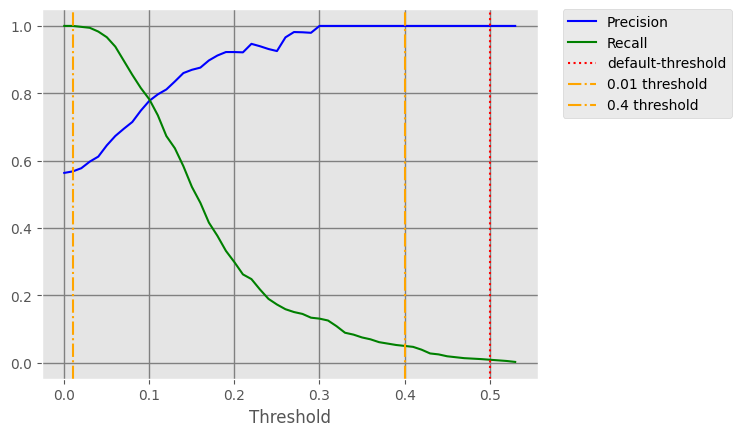

In [189]:
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

threshold là 0.01 và threshold là 0.4

In [190]:
threshold_df = pd.DataFrame({
    'thresholds': [0] + thresholds.tolist(),
    'precisions': precisions, 
    'recalls': recalls, 
})
threshold_df

,thresholds,precisions,recalls
0,0.00,0.563780,1.000000
1,0.00,0.568254,1.000000
2,0.01,0.577670,0.997207
3,0.02,0.597315,0.994413
4,0.03,0.612174,0.983240
5,0.04,0.645522,0.966480
6,0.05,0.673347,0.938547
7,0.06,0.694805,0.896648
8,0.07,0.714953,0.854749
9,0.08,0.748718,0.815642


Bảng dưới đây là kết quả của 2 threshold

In [191]:
thresh_1 = 0.01
thresh_2 = 0.4

idx_threshold_1 = (threshold_df['thresholds']<=thresh_1).sum()
idx_threshold_40 = (threshold_df['thresholds']<=thresh_2).sum()
threshold_df.iloc[[idx_threshold_1,idx_threshold_40],:].reset_index(drop=True)

,thresholds,precisions,recalls
0,0.02,0.597315,0.994413
1,0.41,1.000000,0.039106


**Hãy xem so sánh kết quả của 2 threshold**

In [192]:
y_pred_thres_1pct = (y_prob[:,1] >= thresh_1).astype(int)
y_pred_thres_40pct = (y_prob[:,1] >= thresh_2).astype(int)

In [193]:
# calculate precision/recall/f1/accuracy with selected threshold
p1 = metrics.precision_score(y_test, y_pred_thres_1pct)
r1 = metrics.recall_score(y_test, y_pred_thres_1pct)
a1 = metrics.accuracy_score(y_test, y_pred_thres_1pct)
f1_1 = metrics.f1_score(y_test, y_pred_thres_1pct)

p2 = metrics.precision_score(y_test, y_pred_thres_40pct)
r2 = metrics.recall_score(y_test, y_pred_thres_40pct)
a2 = metrics.accuracy_score(y_test, y_pred_thres_40pct)
f1_2 = metrics.f1_score(y_test, y_pred_thres_40pct)

In [194]:
cm1 = metrics.confusion_matrix(y_test, y_pred_thres_1pct, labels=[0,1])
cm2 = metrics.confusion_matrix(y_test, y_pred_thres_40pct, labels=[0,1])

In [195]:
tn1, fp1, fn1, tp1 = cm1.ravel()
tn2, fp2, fn2, tp2 = cm2.ravel()

Dưới đây là 1 confusion matrix

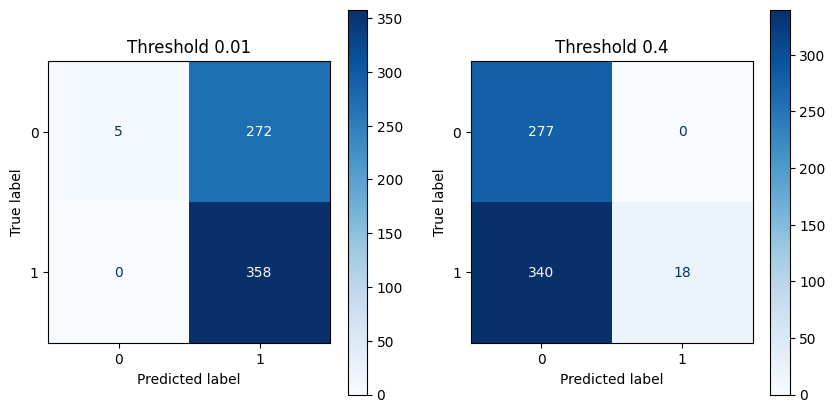

In [196]:
plt.style.use('default')
fig, axs = plt.subplots(1,2, figsize=(10, 5))

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_thres_1pct,cmap=plt.cm.Blues,ax=axs[0])
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_thres_40pct,cmap=plt.cm.Blues,ax=axs[1])
axs[0].set_title('Threshold 0.01')
axs[1].set_title('Threshold 0.4')
plt.show()

In [197]:
benchmark_df = pd.DataFrame({
    'metric': ['tp', 'fp','tp+fp','precision','recall', 'tp', 'fp','tp+fp','precision','recall'],
    'threshold': [0.01,0.01,0.01,0.01,0.01,0.4,0.4,0.4,0.4,0.4],
    'value': [tp1,fp1,tp1+fp1,p1,r1,tp2,fp2,tp2+fp2,p2,r2]
}).pivot_table(index='threshold', columns='metric',values='value')
benchmark_df['tp'] = benchmark_df['tp'].astype(int)
benchmark_df['fp'] = benchmark_df['fp'].astype(int)
benchmark_df['tp+fp'] = benchmark_df['tp+fp'].astype(int)
benchmark_df[['tp', 'fp', 'tp+fp', 'precision','recall']]

metric,tp,fp,tp+fp,precision,recall
threshold,,,,,
0.01,358,272,630,0.568254,1.000000
0.40,18,0,18,1.000000,0.050279


Bạn có thể thấy trade-off giữa precision và recall khi chọn threshold